In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

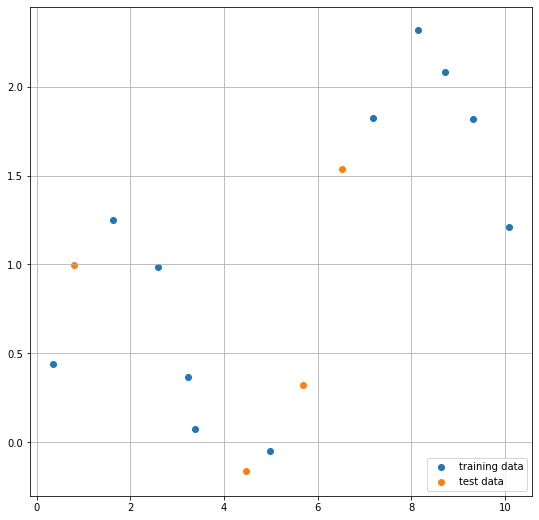

In [4]:
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(9,9))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4)
    plt.grid()
    
part1_scatter()

In [5]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    #Lets apply the method to different degrees:
    Xtrain1=X_train[:,np.newaxis]
    ytrain1=y_train[:,np.newaxis]
    #model1: Linear Model
    model1=LinearRegression()
    model1.fit(Xtrain1,ytrain1)
    xprove=np.linspace(0,10,100).reshape(-1,1)
    y_plot0=model1.predict(xprove)
    #model2:degree3
    poli3=PolynomialFeatures(3)
    xpoli3=poli3.fit_transform(Xtrain1)
    model1.fit(xpoli3,y_train)
    xprove1=poli3.fit_transform(xprove)
    y_plot1=model1.predict(xprove1)
    #Model3:degree6
    poli6=PolynomialFeatures(6)
    xpoli6=poli6.fit_transform(Xtrain1)
    model1.fit(xpoli6,y_train)
    xprove1=poli6.fit_transform(xprove)
    y_plot2=model1.predict(xprove1)
    #Model4:degree9
    poli9=PolynomialFeatures(9)
    xpoli9=poli9.fit_transform(Xtrain1)
    model1.fit(xpoli9,y_train)
    xprove1=poli9.fit_transform(xprove)
    y_plot3=model1.predict(xprove1)
    y0=y_plot0.reshape(1,-1).flatten()
    s=np.array([y0,y_plot1,y_plot2,y_plot3])
    
    return s

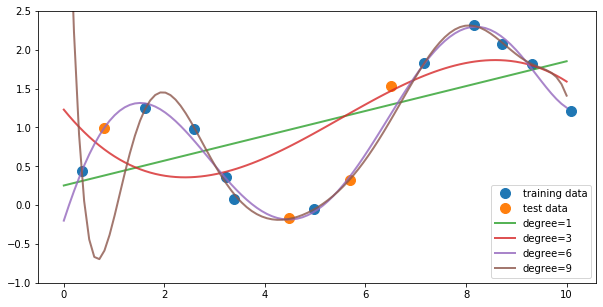

In [7]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

In [8]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    Xtrain1=X_train[:,np.newaxis]
    ytrain1=y_train[:,np.newaxis]
    Xtest1=X_test[:,np.newaxis]
    ytest1=y_test[:,np.newaxis]
    p1=np.zeros(10)
    p2=np.zeros(10)
    for i in range(0,10):
        model1=LinearRegression()
        poli=PolynomialFeatures(i)
        xpoli=poli.fit_transform(Xtrain1)
        model1.fit(xpoli,ytrain1)
        xprove1=poli.fit_transform(Xtrain1)
        xprove2=poli.fit_transform(Xtest1)
        ypred=model1.predict(xprove1)
        ypred1=model1.predict(xprove2)
        p1[i]=model1.score(xprove1,y_train)
        p2[i]=model1.score(xprove2,y_test)
    
    return (p1,p2)

In [9]:
r1train,r1test=answer_two()

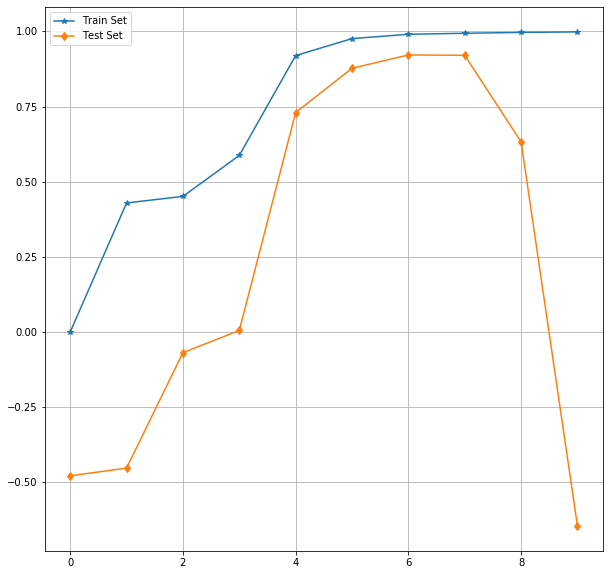

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(np.arange(10),r1train,'-*',label='Train Set')
plt.plot(np.arange(10),r1test,'d-',label='Test Set')
plt.legend()
plt.grid()

In [12]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    Xtrain1=X_train[:,np.newaxis]
    ytrain1=y_train[:,np.newaxis]
    Xtest1=X_test[:,np.newaxis]
    ytest1=y_test[:,np.newaxis]
    #--------------------model--------
    model1=LinearRegression()
    poli=PolynomialFeatures(12)
    xpoli=poli.fit_transform(Xtrain1)
    model1.fit(xpoli,ytrain1)
    #--------------------------------------
    xprove1=poli.fit_transform(Xtest1)
    ypred=model1.predict(xprove1)
    errorlm=model1.score(xprove1,y_test)
    #--------------------------------------
    model2=Lasso(alpha=0.01,max_iter=10000)
    model2.fit(xpoli,ytrain1)
    ypred2=model2.predict(xprove1)
    errorlm1=model2.score(xprove1,y_test)
    return (errorlm,errorlm1)

In [13]:
answer_four()

C:\Users\Diego Barbosa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695889839, tolerance: 0.00068949825403828
  positive)


(-4.311980555741178, 0.8406625614750356)

In [16]:
mush_df=pd.read_csv('mushrooms.csv')
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
mush_df2=pd.get_dummies(mush_df)
mush_df2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

X_subset = X_test2
y_subset = y_test2

In [19]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    modelDTC=DecisionTreeClassifier(random_state=0)
    modelDTC.fit(X_train2,y_train2)
    names=[]
    for i in range(117):
        if modelDTC.feature_importances_[i]!=0:
            names.append([modelDTC.feature_importances_[i],X_train2.columns[i]])
    names.sort(reverse=True)
    names=np.array(names)
    names=names[:5,1]
    names=names.tolist()
    return names

In [20]:
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

In [21]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    gamma=np.logspace(-4,1,6)
    model=SVC(kernel='rbf',C=1,random_state=0)
    trascore,tescore=validation_curve(model,X_subset,y_subset,param_name='gamma',param_range=gamma)
    return np.array(list(map(np.mean, trascore))), np.array(list(map(np.mean, tescore)))

C:\Users\Diego Barbosa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


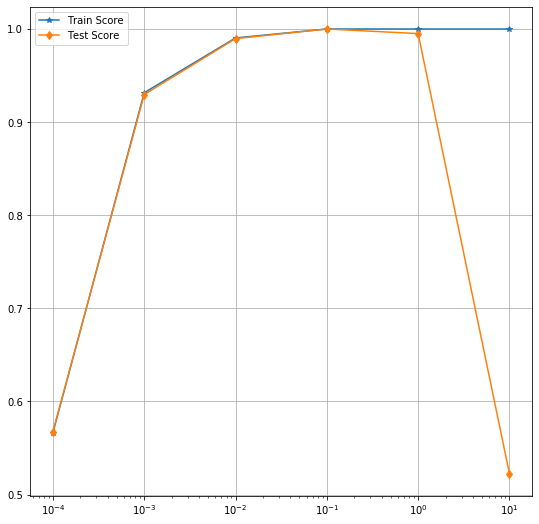

In [22]:
r1,r2=answer_six()
gamma=np.logspace(-4,1,6)
plt.figure(figsize=(9,9))
plt.semilogx(gamma,r1,'-*',label='Train Score')
plt.semilogx(gamma,r2,'-d',label='Test Score')
plt.grid()
plt.legend()